In [11]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,Dense,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import random

<h3>Importing DataSet</h3>

In [2]:
X_train=np.loadtxt('input.csv',delimiter=',')
#We cant use read_csv because it reads as data frame which we can't reshape , loadtxt reads as array form we can easily reshape 
X_test=np.loadtxt('input_test.csv',delimiter=',')
y_train=np.loadtxt('labels.csv',delimiter=',')
y_test=np.loadtxt('labels_test.csv',delimiter=',')

In [3]:
print("Shape of X_train",X_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (2000, 30000)
Shape of X_test (400, 30000)
Shape of y_train (2000,)
Shape of y_test (400,)


In [4]:
X_train=X_train.reshape(len(X_train),100,100,3)
X_test=X_test.reshape(len(X_test),100,100,3)
y_train=y_train.reshape(len(y_train),1)
y_test=y_test.reshape(len(y_test),1)

In [5]:
print("Shape of X_train",X_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (2000, 100, 100, 3)
Shape of X_test (400, 100, 100, 3)
Shape of y_train (2000, 1)
Shape of y_test (400, 1)


In [7]:
X_train=X_train/255.0
X_test=X_test/255.0

This is Dog


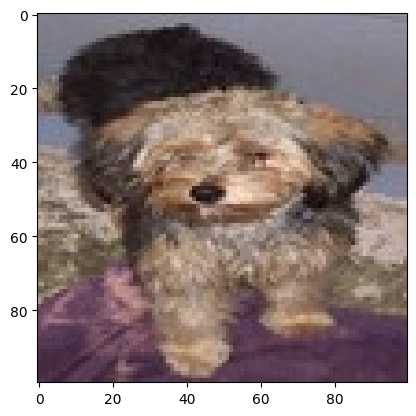

In [39]:
i=random.randint(0,len(X_train))
plt.imshow(X_train[i,:])
if y_train[i]==[1.]:
    print("This is Cat")
else:
    print("This is Dog")
plt.show()

<h3>Training Model</h3>

In [25]:
model=Sequential([
Conv2D(40,(3,3),activation='relu',input_shape=(100,100,3)), #40--> Number of filters , (3,3)-->filter size
MaxPooling2D((2,2)),# (2,2)-->filter size
Conv2D(32,(3,3),activation='relu'),
MaxPooling2D((2,2)),
Flatten(),
Dense(64,activation='relu'),#64-->number of neurons
Dense(1,activation='sigmoid')
])

In [26]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
model.fit(X_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 247ms/step - accuracy: 0.5140 - loss: 0.7328
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 222ms/step - accuracy: 0.5697 - loss: 0.6788
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 249ms/step - accuracy: 0.6352 - loss: 0.6517
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 238ms/step - accuracy: 0.7052 - loss: 0.5962
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 239ms/step - accuracy: 0.7635 - loss: 0.4983
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 245ms/step - accuracy: 0.7933 - loss: 0.4521
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 245ms/step - accuracy: 0.8675 - loss: 0.3338
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 260ms/step - accuracy: 0.8940 - loss: 0.2717
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 245ms/step - accuracy: 0.9380 - loss: 0.1931
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 245ms/step - accuracy: 0.9652 - loss: 0.1191


In [28]:
#batch sizes with 16,32,64,128 more efficient 

In [29]:
model.evaluate(X_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6573 - loss: 1.0579


[0.9241336584091187, 0.6825000047683716]

<h3>Predicting Image</h3>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Model predicted it as cat


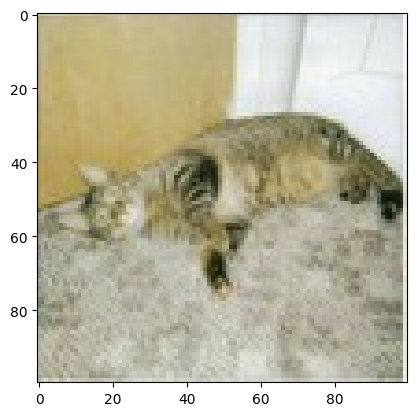

In [40]:
index=random.randint(0,len(X_test))
plt.imshow(X_test[index,:])
y_pred=model.predict(X_test[index,:].reshape(1,100,100,3))
if y_pred>0.5:
    print("Model predicted it as cat")
else:
    print("Model predicted it as dog")
plt.show()